## Read data from the bucket

In [26]:
from datetime import datetime

In [3]:
import xarray as xr
import s3fs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))

In [4]:
#search files
s3.ls('escience2022/Antoine/')

['escience2022/Antoine/.keep',
 'escience2022/Antoine/AMSR-E_ASI_sea_ice_concentration',
 'escience2022/Antoine/AMSR-E_ASI_snow',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration',
 'escience2022/Antoine/AMSR2_ASI_snow',
 'escience2022/Antoine/ESA_SMOS_Arctic_Sea_Surface_Salinity',
 'escience2022/Antoine/Satellite_Arctic_DMS']

In [5]:
s3.ls('escience2022/Antoine/AMSR2_ASI_sea_ice_concentration')

['escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120702-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120703-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120704-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120705-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120706-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120707-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120708-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120709-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120710-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120711-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120712-v5.4.nc',
 'escience

In [8]:
# path to the file: bucket/forlder/filename.nc
s3file = 's3://escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20150331-v5.4.nc'
file = s3.open(s3file)
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:              (x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
Data variables:
    polar_stereographic  |S1 ...
    z                    (y, x) float32 ...
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 19:19:04 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

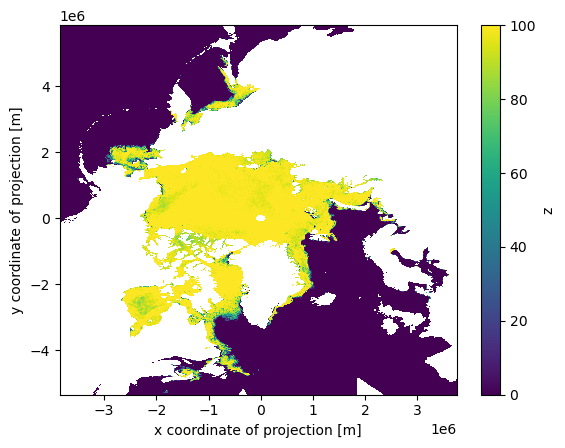

In [10]:
ds.z.plot()

In [13]:
remote_files = 's3://escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-201207*.nc'
remote_files = s3.glob(remote_files)
remote_files

['escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120702-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120703-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120704-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120705-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120706-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120707-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120708-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120709-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120710-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120711-v5.4.nc',
 'escience2022/Antoine/AMSR2_ASI_sea_ice_concentration/asi-AMSR2-n6250-20120712-v5.4.nc',
 'escience

In [17]:
ds.coords

Coordinates:
  * x        (x) float64 -3.847e+06 -3.841e+06 ... 3.741e+06 3.747e+06
  * y        (y) float64 -5.347e+06 -5.341e+06 ... 5.841e+06 5.847e+06

In [37]:
# Iterate through remote_files to create a fileset
fileset = [s3.open(file) for file in remote_files]

In [38]:
def paths_to_datetimeindex(paths):
    return  [datetime.strptime(date.split('/')[-1].split('-')[3], '%Y%m%d') for date in paths]

In [39]:
# Create variable used for time axis
time_var = xr.Variable('time', paths_to_datetimeindex(remote_files))

In [40]:
time_var

<xarray.Variable (time: 30)>
array(['2012-07-02T00:00:00.000000000', '2012-07-03T00:00:00.000000000',
       '2012-07-04T00:00:00.000000000', '2012-07-05T00:00:00.000000000',
       '2012-07-06T00:00:00.000000000', '2012-07-07T00:00:00.000000000',
       '2012-07-08T00:00:00.000000000', '2012-07-09T00:00:00.000000000',
       '2012-07-10T00:00:00.000000000', '2012-07-11T00:00:00.000000000',
       '2012-07-12T00:00:00.000000000', '2012-07-13T00:00:00.000000000',
       '2012-07-14T00:00:00.000000000', '2012-07-15T00:00:00.000000000',
       '2012-07-16T00:00:00.000000000', '2012-07-17T00:00:00.000000000',
       '2012-07-18T00:00:00.000000000', '2012-07-19T00:00:00.000000000',
       '2012-07-20T00:00:00.000000000', '2012-07-21T00:00:00.000000000',
       '2012-07-22T00:00:00.000000000', '2012-07-23T00:00:00.000000000',
       '2012-07-24T00:00:00.000000000', '2012-07-25T00:00:00.000000000',
       '2012-07-26T00:00:00.000000000', '2012-07-27T00:00:00.000000000',
       '2012-07-28T00:00:00.000000000', '2012-07-29T00:00:00.000000000',
       '2012-07-30T00:00:00.000000000', '2012-07-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

## Concatenate all the file

In [41]:
# Load in and concatenate all individual .nc files
dset = xr.concat([xr.open_mfdataset([i],) for i in fileset],
                        dim=time_var)

In [42]:
dset

<xarray.Dataset>
Dimensions:              (time: 30, x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
  * time                 (time) datetime64[ns] 2012-07-02 ... 2012-07-31
Data variables:
    polar_stereographic  (time) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    z                    (time, y, x) float32 dask.array<chunksize=(1, 1792, 1216), meta=np.ndarray>
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 18:50:27 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

In [43]:
dset = dset.rename_dims({'y': 'lat', 'x':'lon'})

In [44]:
dset

<xarray.Dataset>
Dimensions:              (time: 30, lon: 1216, lat: 1792)
Coordinates:
  * x                    (lon) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (lat) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
  * time                 (time) datetime64[ns] 2012-07-02 ... 2012-07-31
Dimensions without coordinates: lon, lat
Data variables:
    polar_stereographic  (time) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    z                    (time, lat, lon) float32 dask.array<chunksize=(1, 1792, 1216), meta=np.ndarray>
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 18:50:27 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

In [47]:
dset.var

<bound method DatasetReductions.var of <xarray.Dataset>
Dimensions:              (time: 30, lon: 1216, lat: 1792)
Coordinates:
  * x                    (lon) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (lat) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
  * time                 (time) datetime64[ns] 2012-07-02 ... 2012-07-31
Dimensions without coordinates: lon, lat
Data variables:
    polar_stereographic  (time) |S1 b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    sic                  (time, lat, lon) float32 dask.array<chunksize=(1, 1792, 1216), meta=np.ndarray>
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 18:50:27 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017

In [48]:
dset.sic

<xarray.DataArray 'sic' (time: 30, lat: 1792, lon: 1216)>
dask.array<concatenate, shape=(30, 1792, 1216), dtype=float32, chunksize=(1, 1792, 1216), chunktype=numpy.ndarray>
Coordinates:
  * x        (lon) float64 -3.847e+06 -3.841e+06 ... 3.741e+06 3.747e+06
  * y        (lat) float64 -5.347e+06 -5.341e+06 ... 5.841e+06 5.847e+06
  * time     (time) datetime64[ns] 2012-07-02 2012-07-03 ... 2012-07-31
Dimensions without coordinates: lat, lon
Attributes:
    long_name:     z
    actual_range:  [  0 100]
    grid_mapping:  polar_stereographic